<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/Hw1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 1.4

1.4.1. Singular value decomposition

In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
'''Singular Value Decomposition (SVD) is a factorization technique to decompose a matrix
into 3 simpler matrices. For any m x n matrix, A, the formula is
A = UΣV^T
A = m x n matrix
U = m x m orthogonal matrix lefthand singular vectors
Σ = m x n diagonal matrix
V = n x n orthogonal matrix righthand singular vectors
'''

A = np.array([[1, 0], [0, 1], [1, 1]])

U, S, VT = np.linalg.svd(A)

print("Matrix A:")
print(A)

print("\nLeft singular vectors (U):")
print(U)

print("\nSingular values (S):")
print(S)

print("\nRight singular vectors (V^T):")
print(VT)

sigma = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(sigma, S)
A_reconstructed = U @ sigma @ VT

print("\nReconstructed matrix:")
print(A_reconstructed)


Matrix A:
[[1 0]
 [0 1]
 [1 1]]

Left singular vectors (U):
[[-4.08248290e-01  7.07106781e-01 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01 -5.77350269e-01]
 [-8.16496581e-01 -1.22629285e-16  5.77350269e-01]]

Singular values (S):
[1.73205081 1.        ]

Right singular vectors (V^T):
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Reconstructed matrix:
[[ 1.00000000e+00 -1.65911125e-16]
 [ 6.22328532e-19  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]]


1.4.2. Low-rank matrix approximations

In [7]:
'''
Low-rank approx. approximates a matrix by another matrix of lower rank.
This retains the information from the original matrix while reducing its size.
This can be calculated using the Singular Value Decomposition (SVD) technique.
'''

A = np.array([[4, 2, 1, 1],
              [3, 1, 0, 0],
              [2, 0, 1, 0],
              [0, 1, 1, 1]])

U, S, VT = np.linalg.svd(A, full_matrices=False)

Sigma = np.diag(S)

k = 1
U_k = U[:, :k]
Sigma_k = Sigma[:k, :k]
VT_k = VT[:k, :]

A_k = U_k @ Sigma_k @ VT_k

print("Original matrix A:")
print(A)

print("\nRank-1 approximation of A:")
print(A_k)

Original matrix A:
[[4 2 1 1]
 [3 1 0 0]
 [2 0 1 0]
 [0 1 1 1]]

Rank-1 approximation of A:
[[4.17212511 1.71999795 0.96935788 0.70779475]
 [2.72387813 1.12294447 0.63286998 0.46210183]
 [1.78199412 0.73464389 0.41403122 0.30231262]
 [0.64998466 0.26796231 0.15101842 0.11026892]]


1.4.3. Principal component analysis

Original Data (centered):
[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]

Transformed Data (PCA):
[[-7.79422863  0.        ]
 [-2.59807621  0.        ]
 [ 2.59807621  0.        ]
 [ 7.79422863 -0.        ]]


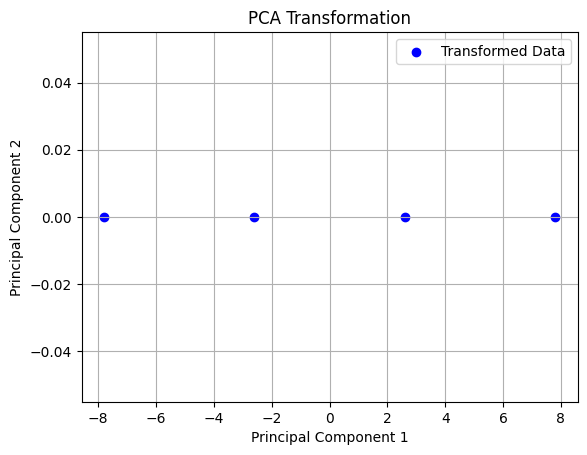

In [11]:
''' Principal component analysis (PCA) identifies patterns in data and express
similarities in differences in the data. It transforms the original dataset into
a new set of variables called principal components.

Given dataset X with m rows and n columns, PCA centers the data first using
Xcentered = X - Xbar
Xbar = mean of each column

2. compute covariance
Σ= (1 / (m−1))* X^Tcentered * Xcentered.
3. compute eigenvectors/values
Σvi = λi*vi
​4. sort eigenvectors
5. select top k principal components
6. project data onto principal components
Xreduced = Xcentered * Pk

PCA formula is SVD formula
'''

X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

X_centered = X - np.mean(X, axis=0)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

print("Original Data (centered):")
print(X_centered)

print("\nTransformed Data (PCA):")
print(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')
plt.grid(True)
plt.legend()
plt.show()

